Example Snippets of my Quantum Circuit Library (QClib) and a brief introduction to Quantum Computing

In [1]:
from qclib import *

$\textbf{A Brief introduction to Quantum Mechanics}$:

Lets consider a system that, when we measure it, can only be in one of two states, 0 or 1 (such as a computer bit). Now consider a machine that prepares the system in the EXACT same way every time.

Classically, when we measure the system we would expect to get the same output every time. However, given quantum observations, we have found that we may prepare a system that, upon measuring, randomly is in state 0 OR 1 despite the initial conditions being the same (this was an incredibly suprising finding; one that Einstein did not like!). To describe this strange behavior conveniently, we turn to the language of linear algebra.


Consider the system in state 0. By definition, when we measure it we will always get a 0 as long as we don't change its state. We will call this state that always returns 0, "$\ket{0}$". Likewise, let "$\ket{1}$" be the state that always returns 1 (this notation, $\ket{\text{"label"}}$, is known as Dirac notation). In quantum mechanics, we will consider states of our system that, upon measurement, are in state $\ket{0}$ a portion of the time and in state $\ket{1}$ otherwise. Specifically, we will write this strange state, labeled "$\ket{\psi}$", as

$$\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$$

where $\alpha, \beta \in \mathbb{C}$. (A quick note: we've written $\ket{\psi}$ as "partly $\ket{0}$, partly $\ket{1}$", so why are we using complex numbers? We will find later on that this choice is incredibly convenient, allowing us to encode aspects such as phase into our states. For simplicity, most examples will be shown with just real numbers however).

After measurement, we let the probability of being in state $\ket{0}$, $p_0$, be $|\alpha|^2$, and the probability of being in state $\ket{1}$, $p_1$, to be be $|\beta|^2$. Clearly, these probabilities must sum to 1, hence we have $|\alpha|^2 + |\beta|^2 = 1$ (Why the magnitude squared? Again, this is chosen for 2 good reasons: 1. Since we decided to include complex numbers, this ensures that the probabilities are positive, real numbers and 2. Notice that in the basis $\{ \ket{0}, \ket{1} \}$, any physical state is a $\textit{normalized vector}$; we will talk more about vector representations later).

$\textbf{Exercise 1:}$ Suppose we prepare a state that returns 0 50% of the time and 1 50% of the time. What are some choices of $\alpha, \beta \in \mathbb{C}$ that satisfy these observations? This will turn out to be a very useful state later on.

$\textbf{Vector Representations and Operations}$:

So far, we have written quantum states, $\ket{\psi}$, as linear combinations of $\{ \ket{0}, \ket{1} \}$. Using these states as a $\textit{basis}$, we can instead write:

$$
\ket{0} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \ket{1} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \ket{\psi} = \alpha \ket{0} + \beta \ket{1} = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}
$$

Now that we can write down our quantum states, lets start manipulating them in interesting ways. These operations will be $\textit{linear}$ and, for the most part, $\textit{unitary}$, hence we can write them as a matrix acting on our state $\ket{\psi}$.

$\textbf{Exercise 2.1:}$ Argue why we should expect these operations to be linear. Consider the superposition principle.

$\textbf{Exercise 2.2:}$ Argue why quantum operations are unitary (Hint: How should probabilities behave?).

Consider the classical $\mathrm{NOT}$ gate. Lets try writing down a quantum operation, called $X$, that emulates this:

$$ 
\ket{0} \mapsto \ket{1}, \ket{1} \mapsto \ket{0}
$$
$$
\Rightarrow X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

$\textbf{Exercise 3:}$ Write down the matrix representation of an operation that sends
$$\ket{0} \mapsto \frac{1}{\sqrt{2}}(\ket{0} + \ket{1}), \;\; \ket{1} \mapsto \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$$
This is known as a $\textit{Hadamard Gate}$, labeled $H$, and will be very useful to us later. Notice that $H\ket{0}$ and $H\ket{1}$ are both solutions to Exercise 1.

$\textbf{Multi-Qubit Systems and Quantum Circuits}$:

We refer to the two-state system from above as a $\textit{qubit}$ (quantum-bit). If we have 2 qubits, there are 4 basis states that we could observe: $\{\ket{00}, \ket{01}, \ket{10}, \ket{11}\}$. In general, for $n$-qubits, there are $2^n$ basis states descibing our system. 
A $\textit{quantum circuit}$ will represent $n$-qubits, each sitting on their own "wire" and all operations (now referred to as $\textit{gates}$) that we will perform, going left to right. Run the following cells to see example circuits acting on one and two qubits and observe how it transforms each initial basis state:

|0> -> 0.71|0> + 0.71|1>
|1> -> 0.71|0> - 0.71|1>


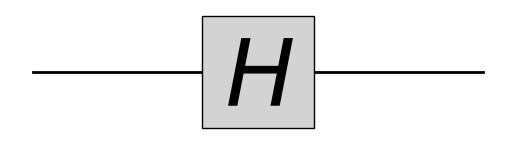

In [2]:
# Create a quantum circuit (QC) applying H to one qubit
qc = QC(1)
qc.add_gate(HADAMARD, targets=[0])

state_0 = np.array([
    [1.0],
    [0.0]
])
state_1 = np.array([
    [0.0],
    [1.0]
])

# Lets run the circuit on each basis state

# This function lets us print our state in Dirac notation
print("|0> ->", dirac(qc.get_matrix() @ state_0))
print("|1> ->", dirac(qc.get_matrix() @ state_1))

# Renders a schematic of the circuit
qc.render()
draw()

|00> -> |11>
|01> -> |10>
|10> -> |01>
|11> -> |00>


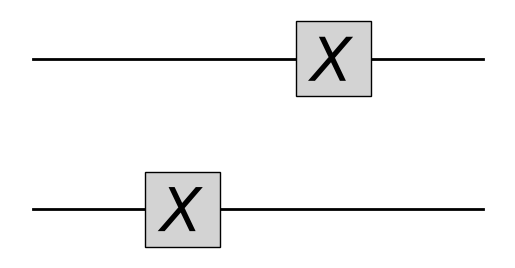

In [3]:
# Create a quantum circuit (QC) and add X-gates on the first and second qubit (wires are indexed bottom to top, i.e. the "first" qubit is the least significant digit)
qc = QC(2)
qc.add_gate(X, targets=[0])
qc.add_gate(X, targets=[1])

# Lets run the circuit on each basis state
for basis_i in range(4):
    basis_state = np.zeros([4, 1])
    basis_state[basis_i] = 1.0

    # This function lets us print our state in Dirac notation
    print(dirac(basis_state), end = " -> ")

    # In this case, our quantum circuit consists of only quantum operations; lets grab the total matrix and apply it to our input
    print(dirac(qc.get_matrix() @ basis_state))

# Renders a schematic of the circuit
qc.render()
draw()

|00> -> 0.71|00> + 0.71|01>
|01> -> 0.71|00> - 0.71|01>
|10> -> 0.71|10> + 0.71|11>
|11> -> 0.71|10> - 0.71|11>


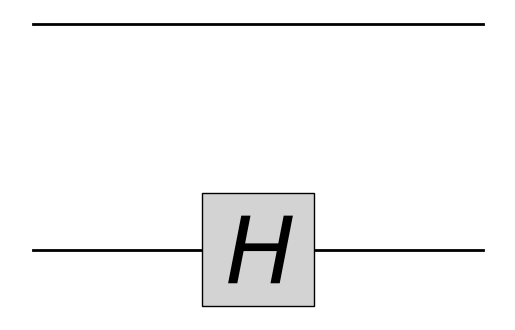

In [4]:
# Similar example, applying H to the first qubit. Notice the second qubit does not change
qc = QC(2)
qc.add_gate(HADAMARD, targets=[0])

# Lets run the circuit on each basis state
for basis_i in range(4):
    basis_state = np.zeros([4, 1])
    basis_state[basis_i] = 1.0

    # This function lets us print our state in Dirac notation
    print(dirac(basis_state), end = " -> ")

    # In this case, our quantum circuit consists of only quantum operations; lets grab the total matrix and apply it to our input
    print(dirac(qc.get_matrix() @ basis_state))

# Renders a schematic of the circuit
qc.render()
draw()

$\textbf{Multi-Qubit Gates}$:

Consider a single-qubit operation $U$. For our purposes, we will consider the multi-qubit operation $\textit{controlled-}U$, $C^{k}(U)$, which acts by $U$ on a qubit ONLY if all $k$ "control" qubits are in state $\ket{1}$.

$\textbf{Exercise 4:}$ The following cell shows an example of a controlled-$\mathrm{NOT}$ gate ($\mathrm{CNOT}$, this is so important it gets its own diagram symbol!), with $X$ acting on the bottom qubit and controlled by the top qubit. In the ordered basis $\{\ket{00}, \ket{01}, \ket{10}, \ket{11}\}$, write down the matrix representation of this gate (Uncomment the code in the next cell to check your answer).

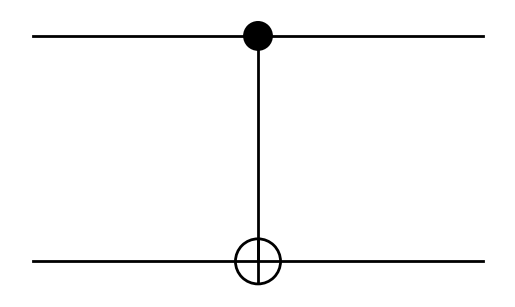

In [5]:
qc = QC(2)
qc.add_gate(X, targets=[0], controls=[1])

# Uncomment this print statement for the answer to the exercise
# print(qc.get_matrix().toarray().real)

# Uncomment this block to see how it acts on each basis state
# for basis_i in range(4):
#     basis_state = np.zeros([4, 1])
#     basis_state[basis_i] = 1.0

#     print(dirac(basis_state), end = " -> ")
#     print(dirac(qc.get_matrix() @ basis_state))

qc.render()
draw()

$\textbf{Exercise 5:}$ Repeat exercise 4, this time with a controlled-Hadamard gate (See next cell for solution).

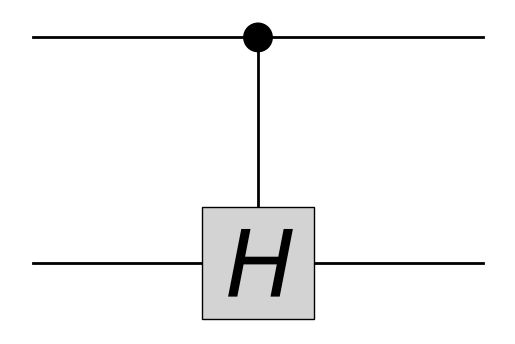

In [6]:
qc = QC(2)
qc.add_gate(HADAMARD, targets=[0], controls=[1])

# Uncomment this print statement for the answer to the exercise
# print(qc.get_matrix().toarray().real)

# Uncomment this block to see how it acts on each basis state
# for basis_i in range(4):
#     basis_state = np.zeros([4, 1])
#     basis_state[basis_i] = 1.0

#     print(dirac(basis_state), end = " -> ")
#     print(dirac(qc.get_matrix() @ basis_state))

qc.render()
draw()

$\textbf{Exercise 6:}$ Repeat exercise 4, this time with a $C^2(X)$ gate (This is also a very important gate; known as the Treffoli Gate).

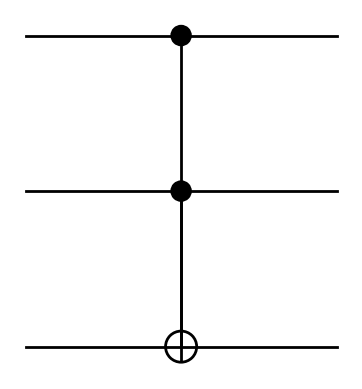

In [7]:
qc = QC(3)
qc.add_gate(X, targets=[0], controls=[1, 2])

# Uncomment this print statement for the answer to the exercise
# print(qc.get_matrix().toarray().real)

# Uncomment this block to see how it acts on each basis state
# for basis_i in range(8):
#     basis_state = np.zeros([8, 1])
#     basis_state[basis_i] = 1.0

#     print(dirac(basis_state), end = " -> ")
#     print(dirac(qc.get_matrix() @ basis_state))

qc.render()
draw()

$\textbf{Measurements}$:

What happens when we measure a quantum state? Lets use the example of $\ket{\psi} = \frac{1}{\sqrt{2}} (\ket{0} + \ket{1})$.

As we originally discussed, $\ket{\psi}$ represents a state that, upon measurement, is in state $\ket{0}$ 50% of the time and otherwise in state $\ket{1}$. Hence, we can think of measuring a qubit as a $\textit{projection}$ to a specific basis state with its associated probability.

See the next cells for examples of measuring qubit:

Input State: 0.71|0> + 0.71|1>
Output Ensemble:
50.0% - |0>
50.0% - |1>


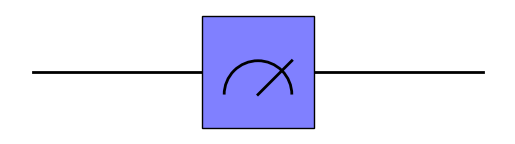

In [8]:
qc = QC(1)

# Measure the qubit's state
qc.add_measurement(target = 0)

# Try your own state!
state = np.zeros([2, 1])
state[0] = 1.0 / np.sqrt(2.0)
state[1] = 1.0 / np.sqrt(2.0)

# Since we have added in measurements, we get an "ensemble" of possible, pure output states
final_ensemble = qc.run(state) # This will get the final ensemble, formatted [probability, state (vector form), state of classical wires (none in this example)]

print(f"Input State: {dirac(state)}")
print("Output Ensemble:")
for pure_state in final_ensemble:
    print(f"{round(100 * pure_state[0], 2)}% - {dirac(pure_state[1])}")

qc.render()
draw()

Input State: |00>
Output Ensemble for qubit 0:
50.0% - |0>
50.0% - |1>


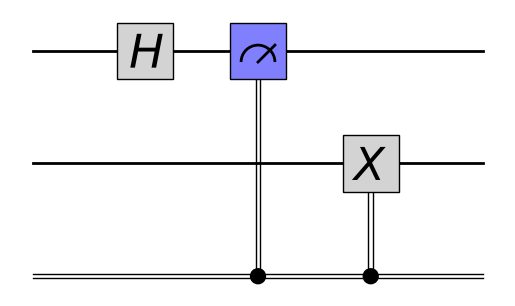

In [9]:
qc = QC(2)

# Mix up the second qubit's state using Hadamard gate
qc.add_gate(HADAMARD, targets = [1])

# Measure the second qubit's state, and save it to classical wire 0
qc.add_measurement(target = 1, control = 0)

# Apply X to the first qubit, controlled by classical wire 0
qc.add_gate(X, targets = [0], classical_control = 0)

# State |00>
state = np.zeros([4, 1])
state[0] = 1.0

final_ensemble = remove_classical(qc.run(state)) # Remove the classical wires from the ensemble
qubit_0_ensemble = qubit_ensemble(final_ensemble, 0) # This will get the ensemble of just qubit 0

print(f"Input State: {dirac(state)}")
print("Output Ensemble for qubit 0:")
for pure_state in qubit_0_ensemble:
    print(f"{round(100 * pure_state[0], 2)}% - {dirac(pure_state[1])}")

qc.render()
draw()

$\textbf{Example 1: Entanglement}$ 

Now that we have the required machinery, lets look at some cool results.

This first example creates two entangled qubits; by measuring the one qubit, you effect the state of the other! Most suprisingly, the state of the system has nothing to do with how far apart these qubits are; this is Einstein's "spooky action at a distance"! As an exercise, try writing down how the circuit acts on each basis state (uncomment the code for the answer).

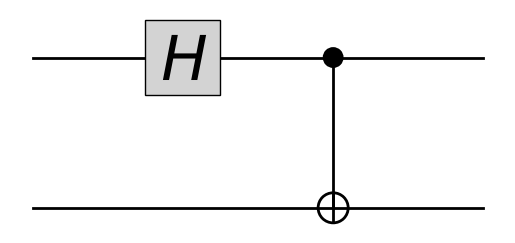

In [10]:
qc = QC(2)

qc.add_gate(HADAMARD, targets = [1])
qc.add_gate(X, targets = [0], controls = [1])

# Uncomment this print statement for the answer to the exercise
# print(qc.get_matrix().toarray().real)

# Uncomment this block to see how it acts on each basis state
# for basis_i in range(4):
#     basis_state = np.zeros([4, 1])
#     basis_state[basis_i] = 1.0

#     print(dirac(basis_state), end = " -> ")
#     print(dirac(qc.get_matrix() @ basis_state))

qc.render()
draw()

These 2-qubit states are known as the $\textit{Bell States}$; run the next example to see how measuring one qubit effects the other.

Original Bottom State: 0.71|0> + 0.71|1>
Final Bottom State:
50.0% - |0>
50.0% - |1>


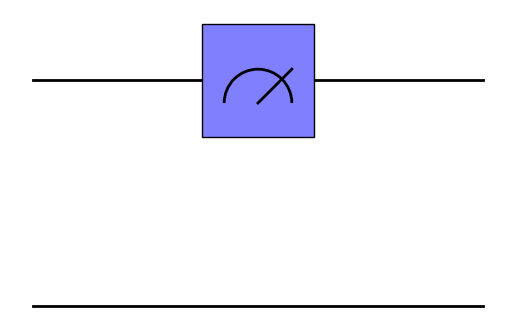

In [11]:
qc = QC(2)

qc.add_measurement(target = 1)

# Starting in entangled state (1st bell state, apply above circuit to |00>)
# 1/sqrt(2) * (|00> + |11>)
state = np.zeros([4, 1])
state[0] = 1.0 / np.sqrt(2.0)
state[3] = 1.0 / np.sqrt(2.0)

# State of the bottom qubit before measurment
print("Original Bottom State:", dirac(qubit_state(state, 0)))

# Ensemble of the bottom qubit after measurement, notice in all cases it is not the original state!
final_ensemble = remove_classical(qc.run(state))
qubit_0_ensemble = qubit_ensemble(final_ensemble, 0)
print("Final Bottom State:")
for pure_state in qubit_0_ensemble:
    print(f"{round(100 * pure_state[0], 2)}% - {dirac(pure_state[1])}")

qc.render()
draw()

$\textbf{Example 2: Quantum State Teleportation}$ 

While the above example does show a very counter-intuitive example of quantum effects, it isn't exactly useful. Consider two people, Alice and Bob, each holding one of the entangled qubits ($\ket{A}, \ket{B}$ resp.). If Alice measures her qubit, Bob's qubit's state will change. However, he won't know what it changed to unless Alice tells him the result of her measurement (hence, we don't get any faster-than-light, causality breaking effects).

However, we can apply entangled qubits to do more interesting tasks. Suppose Alice has another qubit in state $\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$. This exact state holds a lot of information; trying to communicate the exact values of $\alpha$ and $\beta$ to Bob could take a lot of, classical, bits of information! The following circuit uses entangled state to set Bob's qubit to $\ket{\psi}$ in only 2 bits of information, try to figure out how it works! (Hint: Write out the action of each gate step by step on the starting state, $\ket{000}$)

(Here, top to bottom, the qubits start as $\ket{\psi}$, Alice's qubit (initially $\ket{0}$), Bob's qubit (initially $\ket{0}$). The circuit to the left of the dashed line is the entanglement circuit previously seen)

Note that this circuit makes use of a $Z$-gate. This is:
$$
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$

|psi> = (0.39998 + 0.58576i)|0> + (0.6 + 0.37i)|1>
Bob's output ensemble:
	100.0% - (0.39998 + 0.58576i)|0> + (0.6 + 0.37i)|1>
Hooray! Teleport Successful


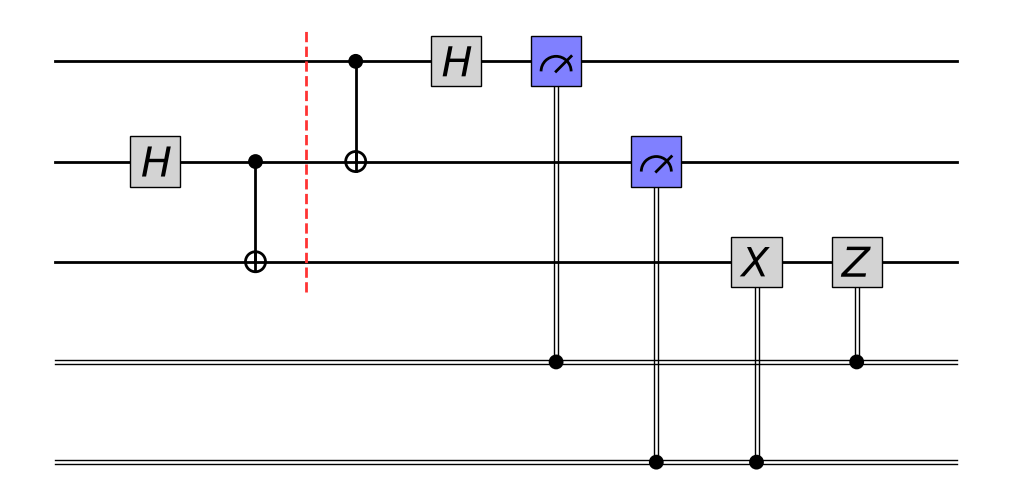

In [12]:
# Try your own values of alpha, beta! Make sure the state is normalized
alpha = complex(-0.3999775, 0.585763)
beta = complex(0.6, 0.37)
# print(round(abs(alpha)**2 + abs(beta)**2, 10))

qc = QC(3)

qc.add_gate(HADAMARD, [1])
qc.add_gate(X, [0], [1])
qc.add_gate(X, [1], [2])
qc.add_gate(HADAMARD, [2])
qc.add_measurement(2, 0)
qc.add_measurement(1, 1)
qc.add_gate(X, [0], classical_control=1)
qc.add_gate(Z, [0], classical_control=0)

# Initial state
state = np.zeros([8, 1], dtype=np.complex128)
state[0] = alpha
state[4] = beta

bob_ensemble = remove_classical(qubit_ensemble(qc.run(state), 0))

print("|psi> =", dirac(qubit_state(state, 2), 5))
print("Bob's output ensemble:")
for pure_state in bob_ensemble:
    print(f"\t{round(100 * pure_state[0], 2)}% - {dirac(pure_state[1], 5)}")

if (len(bob_ensemble) == 1):
    if np.allclose(bob_ensemble[0][1], qubit_state(state, 2)):
        print("Hooray! Teleport Successful")

qc.render(fig_scale = 2.0)
plt.plot([2.5, 2.5], [-.3, 2.3], linestyle='--', linewidth=2, color=[1, .2, .2])
draw()

$\textbf{Closing Remarks:}$

Note that we have left many quesitons unanswered including but not limited to: 

    - Why is Dirac notation helpful?
    - How does this relate to more famous quantum effects? (i.e. double-slit, Schrodinger's Cat, Ultra-Violet Catastrophe, Discrete atomic energy levels)
    - What algorithms can be implemented using a quantum circuit? Can we simulate all classical algorithms?
    - What are qubits physically? How do we actually make these gates?

I'll leave these unanswered, but feel free to explore them on your own.